# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study_df = pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")

# Display the data table for preview
combined_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = combined_mouse_study_df["Mouse ID"].nunique()
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice_ID = combined_mouse_study_df.loc[combined_mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_mouse_study_df.loc[combined_mouse_study_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_mouse_study_df[combined_mouse_study_df['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_combined_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_combined_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_combined_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_combined_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation = clean_combined_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_error = clean_combined_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_table = pd.DataFrame({"Mean":mean,
                            "Median":median,
                            "Variance":variance,
                            "Standard Deviation":standard_deviation,
                             "Standard Error":standard_error,
                             })

# Assemble the resulting series into a single summary DataFrame.
summary_table

C:\Users\leors\AppData\Local\Temp\ipykernel_9940\3579050197.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = clean_combined_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
C:\Users\leors\AppData\Local\Temp\ipykernel_9940\3579050197.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = clean_combined_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
C:\Users\leors\AppData\Local\Temp\ipykernel_9940\3579050197.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify nu

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
advanced_summary=  clean_combined_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Mouse Treatments')

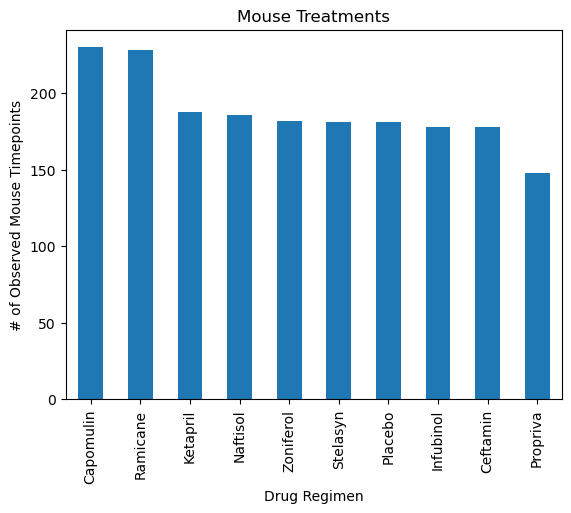

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_combined_df["Drug Regimen"].value_counts()
mice_count

mice_count.plot(kind = "bar", x = "Drug Regimen", y = mice_count) 
plot_pandas = mice_count.plot.bar 

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse Treatments")

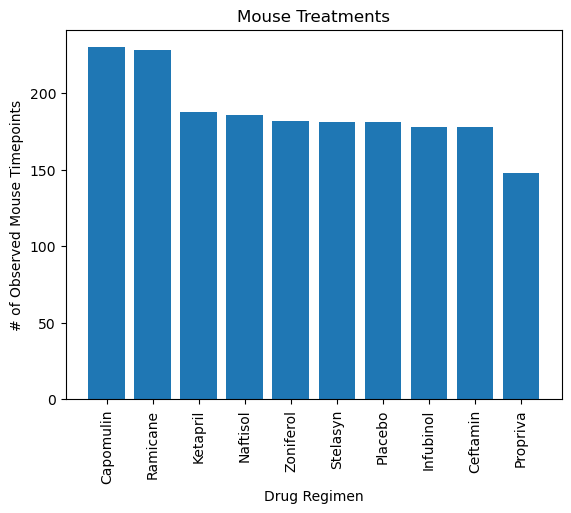

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Mouse Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()


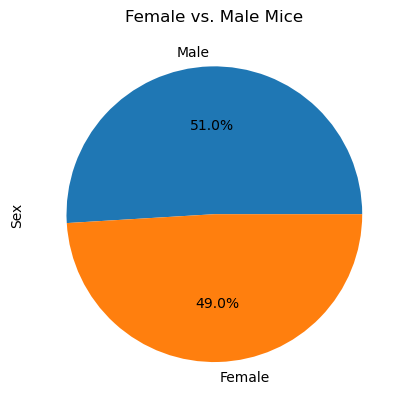

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_combined_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

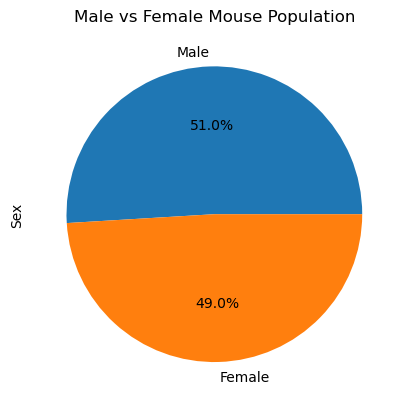

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin  
treatments = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] == "Capomulin") | 
                                    (clean_combined_df["Drug Regimen"] == "Ramicane") |
                                    (clean_combined_df["Drug Regimen"] == "Infubinol") |
                                    (clean_combined_df["Drug Regimen"] == "Ceftamin"),
                                    ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)" ]]     

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = treatments.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ccdf_gtp_merge_df = greatest_timepoint.merge(clean_combined_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],
                                             on = ["Mouse ID", "Timepoint"], how = "left")



In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [[] for i in range(4)]

for i in range(len(ccdf_gtp_merge_df["Tumor Volume (mm3)"])):
    if ccdf_gtp_merge_df["Drug Regimen"][i] == treatments [0]:
        tumor_vol_data[0].append(ccdf_gtp_merge_df["Tumor Volume (mm3)"][i])
    elif ccdf_gtp_merge_df["Drug Regimen"][i] == treatments [1]:
        tumor_vol_data[1].append(ccdf_gtp_merge_df["Tumor Volume (mm3)"][i])
    elif ccdf_gtp_merge_df["Drug Regimen"][i] == treatments [2]:
        tumor_vol_data[2].append(ccdf_gtp_merge_df["Tumor Volume (mm3)"][i])
    elif ccdf_gtp_merge_df["Drug Regimen"][i] == treatments [3]:
        tumor_vol_data[3].append(ccdf_gtp_merge_df["Tumor Volume (mm3)"][i])
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = [[] for i in range (4)]
lowerq = [[] for i in range (4)]
upperq = [[] for i in range (4)]
iqr = [[] for i in range (4)]
lower_bound = [[] for i in range (4)]
upper_bound = [[] for i in range (4)]

outliers_list = {}

bound_index = 0

for index, treatment in enumerate (treatments):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles [index] = ccdf_gtp_merge_df.loc[ccdf_gtp_merge_df["Drug Regimen"] == treatment].quantile([.25,.5,.75])["Tumor Volume (mm3)"]
    # add subset 
    # Determine outliers using upper and lower bounds
    lower_bound [index] = lowerq[index] - (1.5*iqr[index])
    upper_bound [index] = upperq[index] + (1.5*iqr[index])
    
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
  




C:\Users\leors\AppData\Local\Temp\ipykernel_9940\2724466682.py:31: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles [index] = ccdf_gtp_merge_df.loc[ccdf_gtp_merge_df["Drug Regimen"] == treatment].quantile([.25,.5,.75])["Tumor Volume (mm3)"]


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
fig = ax1.boxplot(tumor_vol_data, labels=treatments, 
                  flierprops = dict(marker = "o",markersize=12, markerfacecolor = "red"))
ax1.set_title('Distrubution of tumor volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.show()

    

## Line and Scatter Plots

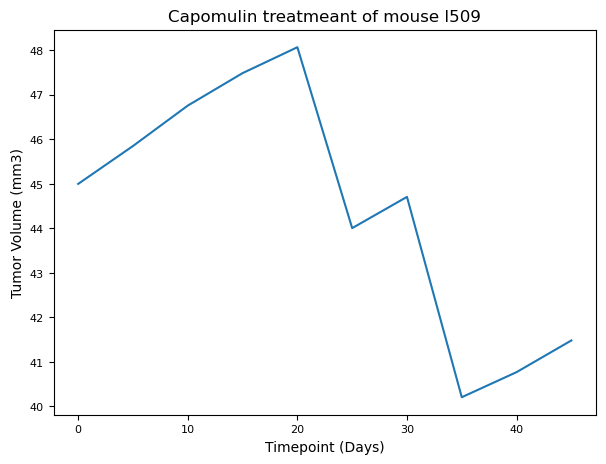

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = list(clean_combined_df.loc[clean_combined_df["Mouse ID"]=='l509'])

capomulin_and_mouseID_df = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] == 'Capomulin') & (clean_combined_df["Mouse ID"] == 'l509'), :]
                            
capomulin_and_mouseID_df= capomulin_and_mouseID_df[["Mouse ID","Tumor Volume (mm3)", 'Timepoint' ]]
plt.figure(figsize=(7,5))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.plot(capomulin_and_mouseID_df["Timepoint"], capomulin_and_mouseID_df["Tumor Volume (mm3)"])
plt.title('Capomulin treatmeant of mouse l509', size =12)
plt.xlabel('Timepoint (Days)', size =10)
plt.ylabel('Tumor Volume (mm3)', size =10)
plt.show()


C:\Users\leors\AppData\Local\Temp\ipykernel_18652\4189050763.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_weight = capomulin_df.groupby(['Mouse ID']).mean()


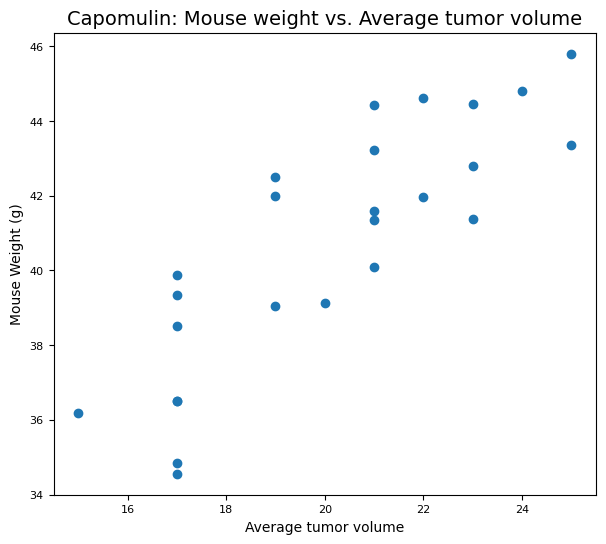

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] == 'Capomulin') , :]
mouse_weight = capomulin_df.groupby(['Mouse ID']).mean()

plt.figure(figsize=(7,6))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.scatter(mouse_weight['Weight (g)'],mouse_weight['Tumor Volume (mm3)'])
plt.title('Capomulin: Mouse weight vs. Average tumor volume', size =14)
plt.xlabel('Average tumor volume', size =10)
plt.ylabel('Mouse Weight (g)', size =10)
plt.show()
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

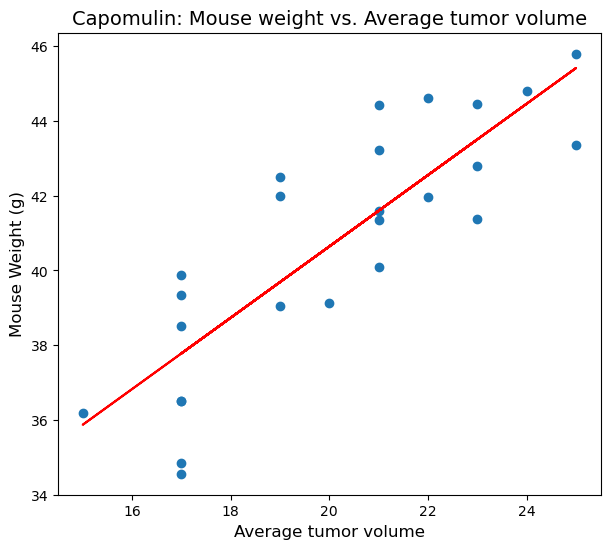

In [51]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

(slope, intercept,rvalue, pvalue, stderr)= linregress(mouse_weight["Weight (g)"],mouse_weight["Tumor Volume (mm3)"])
regression_values = mouse_weight["Weight (g)"]* slope + intercept

plt.figure(figsize=(7,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.scatter(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"])
plt.plot(mouse_weight["Weight (g)"], regression_values, color='red')
plt.title('Capomulin: Mouse weight vs. Average tumor volume', size =14)
plt.xlabel('Average tumor volume', size =12)
plt.ylabel('Mouse Weight (g)', size =12)
plt.show()
